In [1]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Cargar los datos
data = pd.read_csv('/content/spiral_data.csv')
X = data[['x', 'y']].values
y = data['label'].values

In [3]:
# Definir el modelo
model = Sequential([
  Dense(64, input_shape=(2,), activation='relu'),
  Dense(64, activation='relu'),
  Dense(1, activation='sigmoid')
])

In [5]:
# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X, y, epochs=100, batch_size=11, verbose=1)

Epoch 1/100
91/91 [==============================] - 3s 3ms/step - loss: 0.6944 - accuracy: 0.5420
Epoch 2/100
91/91 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.5630
Epoch 3/100
91/91 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.5560
Epoch 4/100
91/91 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.5810
Epoch 5/100
91/91 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.5820
Epoch 6/100
91/91 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.5860
Epoch 7/100
91/91 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.5870
Epoch 8/100
91/91 [==============================] - 0s 2ms/step - loss: 0.6570 - accuracy: 0.6160
Epoch 9/100
91/91 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.5990
Epoch 10/100
91/91 [==============================] - 0s 2ms/step - loss: 0.6592 - accuracy: 0.5950
Epoch 11/

313/313 [==============================] - 1s 2ms/step


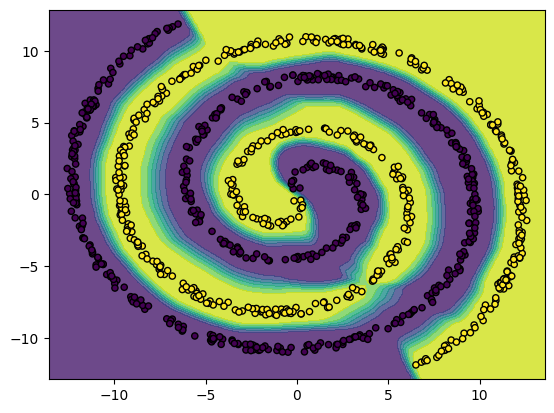

In [6]:
# Función para graficar la frontera de decisión
def plot_decision_boundary(X, y, model):
    # Definir el rango del gráfico
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predecir las clases para cada punto en la malla
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

# Graficar el fondo y los puntos
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.show()

# Graficar los puntos del conjunto de datos y la frontera de decisión
plot_decision_boundary(X, y, model)